<img src="https://i.ytimg.com/vi/BiPzz1xZ0XI/maxresdefault.jpg" width=800 height=600 />


Our datasets are usually a mix of categorical numerical and qualitative variables. In theory, numerical variables do not need any treatment to be passed to machine learning algorithms, but even so, some specific treatments, which we will discuss next, can bring some benefits during the training of our models. Qualitative (categorical) variables, on the other hand, require a pre-treatment in order to be transformed into numbers. We will see below some ways to do this, what are their strengths, weaknesses and we will discuss how to do this pre-processing in practice, with the help of ```scikit-learn``` pipelines.

Let's use the diabetes dataset for our examples.

# Setup

In [18]:
!pip install category-encoders

!pip install  feature-engine

In [23]:
# libs
# category_encoder  --> !pip install category-encoders
# feature_engine use -->!pip install  feature-engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder

from feature_engine import *

#from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [26]:
# dados
df_diabetes = pd.read_csv('diabetes.csv')
df_titanic = pd.read_csv('titanic_reduced.csv')

In [28]:
# Let´s define our variables
X_diabetes = df_diabetes.drop('class' , axis = 1)
X_titanic = df_titanic.drop('Survived' , axis= 1)
Y_diabetes = df_diabetes['class']
Y_titanic = df_titanic['Survived']

In [30]:
# Creating the train and tests datasets
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, Y_diabetes,
                                                                                       train_size=0.85,
                                                                                       random_state=123)
X_train_titanic , X_test_titanic, y_train_titanic , y_text_titanic = train_test_split(X_titanic , Y_titanic,
                                                                                    train_size=0.85,
                                                                                    random_state=123)


# Data Preparation

The data preparation process predates the training of the machine-learning algorithm. The idea is to create a process that, for each input (feature/variable), performs a specific transformation. We will describe some of these transformations from now on, starting with numerical variables.

## Numerical Variables

The variables that are easiest to deal with are numerical variables, as machine-learning algorithms are already capable of interpreting them in their "raw" form. However, algorithms and their optimization processes can benefit from this transformation process. In general, machine learning algorithms do not understand that features are of different units and may assume that larger scale variables should be given greater "weight" as a result. Generally, algorithms that rely on calculating distances or gradient descents can suffer from the scaling factor. To avoid this kind of situation, we use scaling methods. Now we will present three transformation processes, their characteristics, strengths and weaknesses.

### MinMax Scaler

<img src="https://miro.medium.com/max/416/1*vEqbUwYneOkRQXCdPU0n9g.png" height=300 width=300/>


The first transformer that we will see is the MinMaxScaler, which is given by the expression below:

<img src=https://cdn-images-1.medium.com/max/800/0*K2QwZ16bEAxA4hUe.jpg height=300 width=300 />

Given a variable X, we will transform each value of X through the expression above.
for this we will need:
- Extract the Minimum from the X vector
- Extract the Max from the X vector

In [32]:
x_age_train = X_train_diabetes[['age']]
x_mass_train = X_train_diabetes[['mass']]

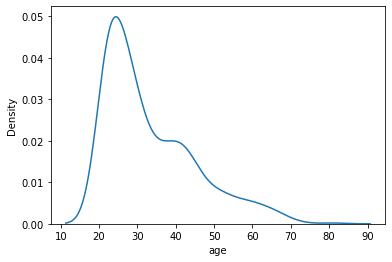

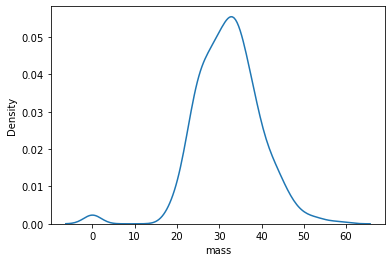

In [33]:
# analysing the distribution

sns.kdeplot(x_age_train['age'])
plt.show()
sns.kdeplot(x_mass_train['mass'])
plt.show()

In [34]:
x_age_min =  np.min(x_age_train)
x_age_max = np.max(x_age_train)
x_mass_min = np.min(x_mass_train)
x_mass_max = np.max(x_mass_train)

In [35]:
x_age_train['min_max'] = (x_age_train - x_age_min)/(x_age_max - x_age_min)
x_mass_train['min_max'] = (x_mass_train - x_mass_min)/(x_mass_max - x_mass_min)

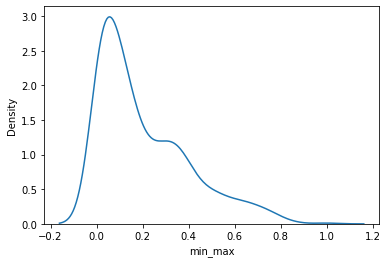

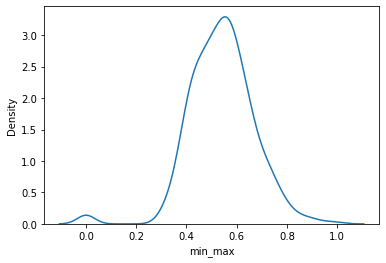

In [36]:
sns.kdeplot(x_age_train['min_max'])
plt.show()
sns.kdeplot(x_mass_train['min_max'])
plt.show()

Note that the distribution format does not change!! Only the range of values ​​is changed, so that it behaves between 0 and 1.

> **Warning: Transformations need to be performed in training and testing!! However, we need to use the parameters obtained from the training base (minimum and maximum) to replicate the transformation in the test base. That is, when performing the transformation, we will use the minimum and maximum values ​​extracted from the training vector!!!**

But how is it in production? Do I need to store these values ​​somewhere?
Yes, of course.

But for that, ```scikit-learn``` has a series of Classes and Methods that will help us in this step. We will implement the ```MinMaxScaler``` class.

In [37]:
min_max_scaler = MinMaxScaler()


To use this transformer, we will need the ```.fit()``` and ```.transform()``` methods

In the ```.fit()``` method, the transformer extracts what it needs to perform the transformation. In our case, this is equivalent to extracting the maximum and minimum values ​​from the vector. For this, we will pass our vector as a parameter.

In [39]:
min_max_scaler.fit(X_train_diabetes[['age']])

MinMaxScaler()

In [40]:
min_max_scaler.transform((X_train_diabetes[['age']]))

array([[0.11666667],
       [0.48333333],
       [0.7       ],
       [0.41666667],
       [0.05      ],
       [0.26666667],
       [0.35      ],
       [0.01666667],
       [0.03333333],
       [0.03333333],
       [0.51666667],
       [0.7       ],
       [0.08333333],
       [0.15      ],
       [0.05      ],
       [0.48333333],
       [0.28333333],
       [0.01666667],
       [0.13333333],
       [0.        ],
       [0.1       ],
       [0.76666667],
       [0.26666667],
       [0.1       ],
       [0.15      ],
       [0.01666667],
       [0.55      ],
       [0.01666667],
       [0.        ],
       [0.11666667],
       [0.25      ],
       [0.35      ],
       [0.16666667],
       [0.03333333],
       [0.68333333],
       [0.        ],
       [0.06666667],
       [0.33333333],
       [0.11666667],
       [0.06666667],
       [0.13333333],
       [0.3       ],
       [0.08333333],
       [0.41666667],
       [0.05      ],
       [0.01666667],
       [0.4       ],
       [0.433

If we want to apply it to our entire training dataset, that is, to all our features at once, we can pass the entire training dataframe. Furthermore, the ```.fit_transform()``` method allows extracting the parameters and already applying the desired transformation.

In [41]:
min_max_scaler.fit_transform(X_train_diabetes[['age']])

array([[0.11666667],
       [0.48333333],
       [0.7       ],
       [0.41666667],
       [0.05      ],
       [0.26666667],
       [0.35      ],
       [0.01666667],
       [0.03333333],
       [0.03333333],
       [0.51666667],
       [0.7       ],
       [0.08333333],
       [0.15      ],
       [0.05      ],
       [0.48333333],
       [0.28333333],
       [0.01666667],
       [0.13333333],
       [0.        ],
       [0.1       ],
       [0.76666667],
       [0.26666667],
       [0.1       ],
       [0.15      ],
       [0.01666667],
       [0.55      ],
       [0.01666667],
       [0.        ],
       [0.11666667],
       [0.25      ],
       [0.35      ],
       [0.16666667],
       [0.03333333],
       [0.68333333],
       [0.        ],
       [0.06666667],
       [0.33333333],
       [0.11666667],
       [0.06666667],
       [0.13333333],
       [0.3       ],
       [0.08333333],
       [0.41666667],
       [0.05      ],
       [0.01666667],
       [0.4       ],
       [0.433

In the end, we need to perform the transformation on our test set! To do this, just call the ```.transform()``` method

In [42]:
min_max_scaler.transform(X_test_diabetes[['age']])

array([[0.5       ],
       [0.06666667],
       [0.23333333],
       [0.06666667],
       [0.03333333],
       [0.4       ],
       [0.3       ],
       [0.28333333],
       [0.43333333],
       [0.21666667],
       [0.21666667],
       [0.06666667],
       [0.01666667],
       [0.21666667],
       [0.16666667],
       [0.        ],
       [0.38333333],
       [0.03333333],
       [0.08333333],
       [0.16666667],
       [0.26666667],
       [0.        ],
       [0.1       ],
       [0.33333333],
       [0.53333333],
       [0.        ],
       [0.01666667],
       [0.03333333],
       [0.58333333],
       [0.38333333],
       [0.        ],
       [0.08333333],
       [0.06666667],
       [0.06666667],
       [0.1       ],
       [0.61666667],
       [0.2       ],
       [0.2       ],
       [0.        ],
       [0.01666667],
       [0.01666667],
       [0.01666667],
       [0.15      ],
       [0.73333333],
       [0.58333333],
       [0.33333333],
       [0.26666667],
       [0.   

In [43]:
min_max_full = MinMaxScaler()

In [44]:
min_max_full.fit(X_train_diabetes)

MinMaxScaler()

In [45]:
X_train_diabetes_scaled = min_max_full.transform(X_train_diabetes)

In [46]:
X_train_diabetes_scaled

array([[0.05882353, 0.50251256, 0.59016393, ..., 0.42592593, 0.24765158,
        0.11666667],
       [0.64705882, 0.69346734, 0.60655738, ..., 0.60774411, 0.20452605,
        0.48333333],
       [0.23529412, 0.66331658, 0.70491803, ..., 0.47138047, 0.14560205,
        0.7       ],
       ...,
       [0.05882353, 0.54773869, 0.49180328, ..., 0.42760943, 0.37105038,
        0.        ],
       [0.29411765, 0.49748744, 0.44262295, ..., 0.57239057, 0.17976089,
        0.15      ],
       [0.70588235, 0.42211055, 0.59016393, ..., 0.5       , 0.09350982,
        0.41666667]])

In [47]:
pd.DataFrame(X_train_diabetes_scaled , columns= X_train_diabetes.columns)

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.058824,0.502513,0.590164,0.121212,0.094086,0.425926,0.247652,0.116667
1,0.647059,0.693467,0.606557,0.262626,0.193548,0.607744,0.204526,0.483333
2,0.235294,0.663317,0.704918,0.313131,0.000000,0.471380,0.145602,0.700000
3,0.235294,0.577889,0.590164,0.000000,0.000000,0.486532,0.127242,0.416667
4,0.058824,0.683417,0.606557,0.505051,0.274194,0.629630,0.137062,0.050000
...,...,...,...,...,...,...,...,...
647,0.352941,0.467337,0.409836,0.303030,0.086022,0.483165,0.118702,0.033333
648,0.000000,0.623116,0.573770,0.202020,0.000000,0.461279,0.075149,0.250000
649,0.058824,0.547739,0.491803,0.080808,0.244624,0.427609,0.371050,0.000000
650,0.294118,0.497487,0.442623,0.282828,0.111559,0.572391,0.179761,0.150000



Disadvantage:
- The method is sensitive to outliers.

### Standard Scaler


We've already seen the Standard Scaler, when we talk about standardizing a normal curve.

<img src=https://cdn-images-1.medium.com/max/800/0*vQEjz0mvylP--30Q.GIF height=300 width=300/>


In this method, we extract the mean and standard deviation. From there, we subtract the mean of each sample and divide the result by the standard deviation.

After the transformation, the data are centered at 0 and have a standard deviation of 1.

Note that StandardScaler centers the data at 0. Also, there is no defined range, as in MinMaxScaler. However, the range of features is close.


If our data is normally distributed, algorithms can benefit more from using StandardScaler instead of MinMaxScaler.

Disadvantage:
- Sensitive to outliers

### Robust Scaler

A robust outlier method is the RobustScaler. This transformation is similar to the MinMax transformation, but uses Quartiles 1 and 3 to apply the scaling, instead of the maximum and minimum values.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200624151526/for4.png" height=300 width=300/>


The method implemented in ```scikit-learn``` subtracts the median (Q2) in place of Q1.


Note that the range changes, becomes better behaved, and that there are no outliers.

> **NOTE**: There is no golden rule or guarantee of improving the model using any transformer. We can only really say something after training the model. Furthermore, the same model can benefit from different transformers in different situations. However, it is worth noting that certain algorithms, such as PCA or KMeans, require the application of a specific transformer. Overall, the performances are similar to different transformers, but this is a setting that can be tweaked to result in the best possible performance.

## Qualitative Variables (Categorical)

Numerical variables are much easier to handle, they don't present many problems in production. When we talk about qualitative variables, then we do have potential problems for which we need to have some strategies.

The 2 main problems are:
- New levels in variables
- Rare levels

Before talking about these 2 problems, let's show how we can encode qualitative variables as numbers.


In this dataset, we have the following categorical variables:

- **Embarked**: Indicates the port where the passenger embarked
- **Sex**: Indicates the sex of the passenger
- **Pclass**: Class that the passenger traveled

### One-Hot Encoder

This first transformer we already know! That's right, we already know, but we call it ```pd.get_dummies()```


The idea is that for each level of the categorical variable a column is created, which can receive the value 0 or 1.

<img src="https://i.imgur.com/TW5m0aJ.png" height=700 width=700/>

Let's use ```OneHotEncoder``` to encode the variables


Disadvantages:
- If the variable has many levels (Brazil states), many columns will be created and this can be a problem in terms of processing and high dimensionality (curse of dimensionality).
- Some models (trees) benefit more from other methods.

### OrdinalEncoder


When there are ordinal categorical variables, these are best encoded by ```OrdinalEncoder```.
OrdinalEncoder assigns a number to each level of the variable, according to the order pre-established by the user.


Note that Poor < Good < Very Good < Excellent

If we don't specify the order of the levels, the transformer assigns the labels alphabetically in the levels.

### Frequency Encoder

When we have many levels in the categorical variables or even they do not have any ordinal degree, we can use the Frequency Encoder. This method replaces each class level with its frequency in the training data.


For example, in the variable Sex, male would be replaced by 0.65 and female by 0.35.

### Target Encoder

Finally, let's look at the Target Encoder. This method is similar to the previous one. However, instead of simply looking at the frequency of levels, it looks at the frequency of levels at the levels of the response variables, in the case of Target being categorical, and the average of Target, in case of Target being continuous.

# Column Transformer

So far we've seen how to apply transformations to categorical and numeric data separately. We would have to collect the results of our transformations and group them together to form a transformed set to insert into a Machine Learning model. Now we will learn how to perform all the processing in a single step, with the help of the ```Columns Transformer``` and ```Pipeline``` Classes


In it we have the variables:
- Embarked: Nominal Qualitative
- Sex: Nominal Qualitative
- Age: Continuous Numeric
- Pclass: Ordinal Qualitative
- Survived: Binary Qualitative Target


Therefore, we will use the following transformers:
- OrdinalEncoder: Pclass
- MinMaxScaler: Age
- OneHotEncoder: Sex, Embarked


Furthermore, at the end of the processing, we will use the ```Scikit-Learn``` Logistic Regression model


To build our universal transformer we need to create tuples.

The first element of the tuple will be an identifier, a string, which identifies the name of the process (it can be any name). The second element is the transformer itself and its properties, if any. The third element is a list with the name of the columns that will receive the processing.

Once that's done, we put everything in a list and pass it to the ```ColumnTransformer``` class


Finally, we will use the ```Pipeline``` class which will combine the preprocessing and training/prediction steps.

To this class we pass a list of tuples. The model always comes last!! Before it, any transformer can come, any class that has the fit and transform method.


Here we will pass the pre_processor we just created to our pipeline. This will be our step number 1, followed by step number 2, which will be the Logistic Regression model.

Let's split our data into training and testing.


With our pipeline built, we just need to call the ```.fit()``` method and then ```.predit()``` to make predictions with our model.


Shall we visualize our pre-processing and modeling pipeline?

> Note: In addition to handling data pre-processing, a modeling pipeline needs to handle filling in missing values ​​and handling new levels that may arise in categorical variables. For example, let's say we train a model to predict sales at points of sale that use PicPay. One of the variables used was the State to which the establishment belongs. However, PicPay expanded to new states and even states that did not participate in model training. Thus, even not having seen anything about that state, the model should be able to make some estimate. We will learn in classification classes how to deal with this and other problems related to categorical variables, such as the issue of rare levels.

In [1]:
pip install jupyterthemes

In [8]:
import jupyterthemes as jt
jt.get_themes()

['chesterish',
 'grade3',
 'gruvboxd',
 'gruvboxl',
 'monokai',
 'oceans16',
 'onedork',
 'solarizedd',
 'solarizedl']

In [10]:
jt.install_theme(theme = 'oceans16')